In [3]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [4]:
ddir = '/global/cfs/projectdirs/dune/www/data/2x2/nearline/packet/beam/ramp/'
fname = 'packet-ramp-2024_06_11_14_00_19_CDT.h5'

In [5]:
f=h5py.File(ddir+fname)
packets = f['packets'][:]

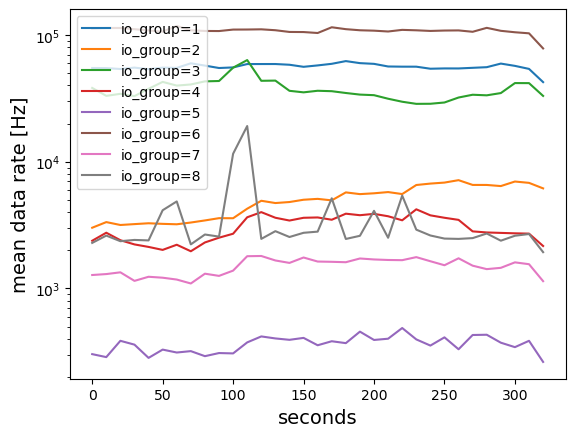

In [11]:
fig = plt.figure()

for io_group in range(1,9):
    p = packets[packets['io_group']==io_group]
    p=p[ np.logical_or(p['packet_type']==0, p['packet_type']==6) ]
    syncs = p['packet_type']==6
    sync_indices = np.argwhere(syncs).flatten()
    packets_per_sync = np.diff(sync_indices) # get number of packets between sync pulses
    
    #plot 10 second mean--should be similar to DQM metrics
    bunches = np.zeros(33)

    for i in range(len(packets_per_sync)):
        bunches[ i//10 ] += packets_per_sync[i]
    plt.plot([10*i for i in range(bunches.shape[0])], bunches, label='io_group={}'.format(io_group))

plt.xlabel('seconds', fontsize=14)
plt.ylabel('mean data rate [Hz]', fontsize=14)
plt.legend()
plt.yscale('log')
    
    